c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:03:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_37780\1743249235.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=accuracies, palette="Set2")
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_37780\1743249235.py:87: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


📊 MODELO: Regresión Logística
✔️ Accuracy: 0.9756
📑 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     1.0000    0.8889    0.9412         9
           1     1.0000    1.0000    1.0000        23
           2     0.9000    1.0000    0.9474         9

    accuracy                         0.9756        41
   macro avg     0.9667    0.9630    0.9628        41
weighted avg     0.9780    0.9756    0.9755        41

🧩 Matriz de Confusión:
[[ 8  0  1]
 [ 0 23  0]
 [ 0  0  9]]
📊 MODELO: Random Forest
✔️ Accuracy: 0.9512
📑 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8889    0.8889    0.8889         9
           1     1.0000    0.9565    0.9778        23
           2     0.9000    1.0000    0.9474         9

    accuracy                         0.9512        41
   macro avg     0.9296    0.9485    0.9380        41
weighted avg     0.9537    0.9512    0.9516        41

🧩 Matriz de Confusión:
[[ 8 

C:\Users\USUARIO\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


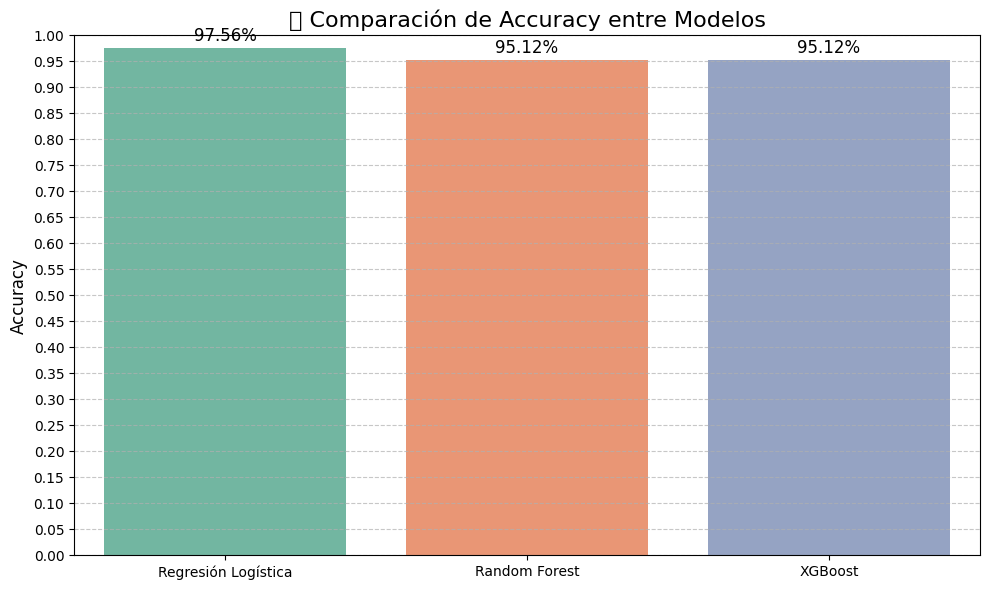


🔁 Validación cruzada K-Fold (k=5):
Accuracy promedio (Regresión Logística): 0.9926
Accuracy promedio (Random Forest): 0.9704
Accuracy promedio (XGBoost): 0.9778


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:03:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:03:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:03:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:03:22] WARNING: 

In [4]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 2. Cargar dataset
df = pd.read_csv("Liga1Proce.csv")

# 3. Preparar datos (solo columnas numéricas por ahora)
X = df[["Goles Local", "Goles Visitante"]]
y = df["Resultado Codificado"]

# 4. Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Definir y entrenar modelos
modelo_lr = LogisticRegression(max_iter=1000)
modelo_rf = RandomForestClassifier()
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)

modelo_lr.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)
modelo_xgb.fit(X_train, y_train)

# 7. Predicciones
y_pred_lr = modelo_lr.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_xgb = modelo_xgb.predict(X_test)
modelos = {
    "Regresión Logística": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for nombre, y_pred in modelos.items():
    print("="*60)
    print(f"📊 MODELO: {nombre}")
    print(f"✔️ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📑 Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, digits=4))
    print("🧩 Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
# 8. Evaluación de modelos
def evaluar_modelo(nombre, y_test, y_pred):
    print(f"\n🧪 Evaluación de: {nombre}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

evaluar_modelo("Regresión Logística", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("XGBoost", y_test, y_pred_xgb)

# 9. Comparación visual de accuracy
modelos = ['Regresión Logística', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=modelos, y=accuracies, palette="Set2")

plt.title("🎯 Comparación de Accuracy entre Modelos", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de cada barra
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.015, f"{acc:.2%}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 10. Validación cruzada (K-Fold con k=5)
print("\n🔁 Validación cruzada K-Fold (k=5):")

cv_scores_lr = cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='accuracy')
print("Accuracy promedio (Regresión Logística):", round(cv_scores_lr.mean(), 4))

cv_scores_rf = cross_val_score(modelo_rf, X_scaled, y, cv=5, scoring='accuracy')
print("Accuracy promedio (Random Forest):", round(cv_scores_rf.mean(), 4))

modelo_xgb_cv = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
cv_scores_xgb = cross_val_score(modelo_xgb_cv, X_scaled, y, cv=5, scoring='accuracy')
print("Accuracy promedio (XGBoost):", round(cv_scores_xgb.mean(), 4))
